* 下载数据集

In [1]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid # 下载数据集使用
from torch_geometric.transforms import NormalizeFeatures
import requests

#到国内gitee镜像下载
base_url = "https://gitee.com/jiajiewu/planetoid/raw/master/data/ind.cora."
names = ['x', 'tx', 'allx', 'y', 'ty', 'ally', 'graph', 'test.index']
for name in names:
    file_url = base_url+name
    r = requests.get(file_url)
    with open('./data/cora/Cora/raw/ind.cora.'+name, 'wb') as f:
        f.write(r.content)
dataset=Planetoid(root=r'./data/cora',name="Cora")  #直接下载可能出现网络问题
data = dataset[0]
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [ ]:
# 创建专用conda环境
conda create -n aai python=3.10
# 切换到专用环境
conda activate aai
# 安装PyTorch
conda install pytorch::pytorch torchvision torchaudio -c pytorch
# 安装可视化库
conda install matplotlib
# 安装PyTorch其他库
pip install torch-cluster torch-scatter torch-sparse torch-spline_conv -f https://pytorch-geometric.com/whl/torch-2.3.1+cpu.html
# 安装PyG
pip install torch-geometric

Cora只有一个图，该图有2708个节点，每个节点1433维特征，10556条边。

下面对数据集进行展示，利用TSNE降维到2维便于展示，我在运行中出现zsh: abort 等问题，始终不能出图，后来pytorch和torch_geometric及其扩展依赖全部卸载，都按照第一节中的方法安装，问题解除，背后原因官网有说明，pip和conda 安装有冲突，最好统一一种形式安装；

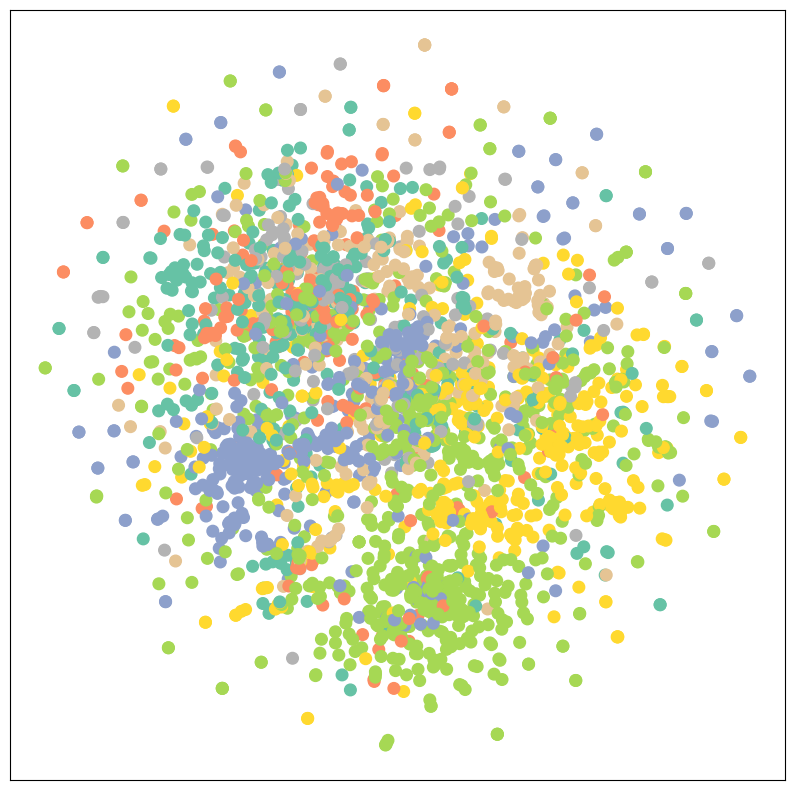

In [2]:
# 可视化部分
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy()) 
    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()
    
visualize(data.x, color=data.y)

Epoch: 001, Loss: 1.9589
Epoch: 002, Loss: 1.9115
Epoch: 003, Loss: 1.8296
Epoch: 004, Loss: 1.7399
Epoch: 005, Loss: 1.6110
Epoch: 006, Loss: 1.5677
Epoch: 007, Loss: 1.4014
Epoch: 008, Loss: 1.3110
Epoch: 009, Loss: 1.2361
Epoch: 010, Loss: 1.1290
Epoch: 011, Loss: 1.0854
Epoch: 012, Loss: 0.9861
Epoch: 013, Loss: 0.8618
Epoch: 014, Loss: 0.8257
Epoch: 015, Loss: 0.6789
Epoch: 016, Loss: 0.7199
Epoch: 017, Loss: 0.6508
Epoch: 018, Loss: 0.6374
Epoch: 019, Loss: 0.5672
Epoch: 020, Loss: 0.4760
Epoch: 021, Loss: 0.4683
Epoch: 022, Loss: 0.4964
Epoch: 023, Loss: 0.4768
Epoch: 024, Loss: 0.4000
Epoch: 025, Loss: 0.4318
Epoch: 026, Loss: 0.4132
Epoch: 027, Loss: 0.3652
Epoch: 028, Loss: 0.3459
Epoch: 029, Loss: 0.3336
Epoch: 030, Loss: 0.2924
Epoch: 031, Loss: 0.3015
Epoch: 032, Loss: 0.3098
Epoch: 033, Loss: 0.2611
Epoch: 034, Loss: 0.3010
Epoch: 035, Loss: 0.3030
Epoch: 036, Loss: 0.2753
Epoch: 037, Loss: 0.2880
Epoch: 038, Loss: 0.2475
Epoch: 039, Loss: 0.3480
Epoch: 040, Loss: 0.2840


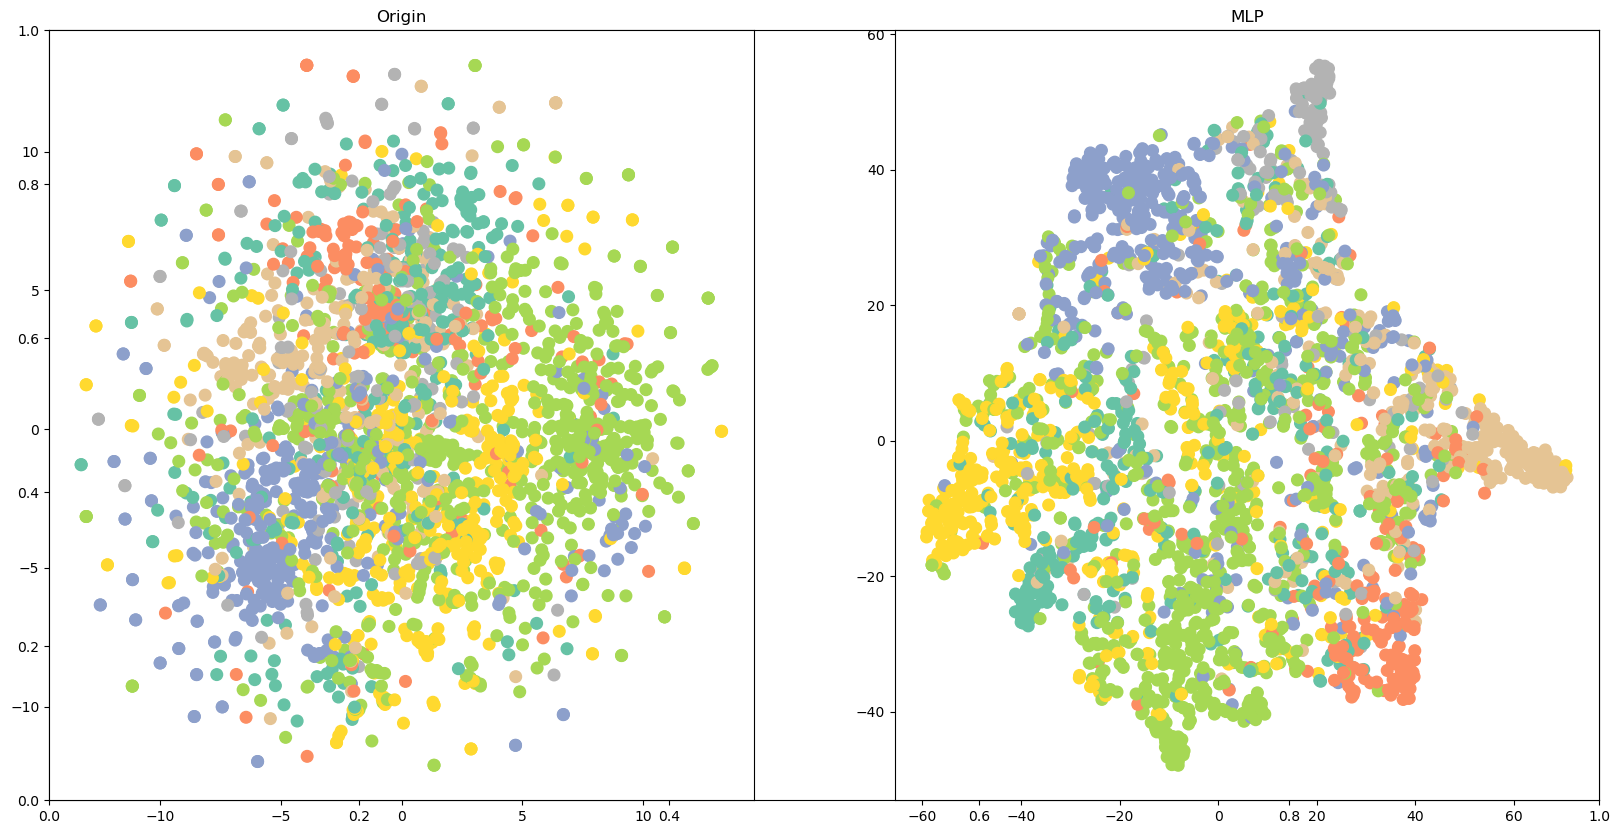

In [3]:
import torch
from torch.nn import Linear
import torch.nn.functional as F

# MLP网络定义
class MLP(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(MLP, self).__init__()
        # torch.manual_seed(12345)
        self.lin1 = Linear(dataset.num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, dataset.num_classes)
    def forward(self, x):
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x

# MLP网络训练函数
def train():
      model.train()
      optimizer.zero_grad()
      out = model(data.x)   #输入初始节点表征：torch.Size([2708, 1433])
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
    
      return loss
    
# MLP网络测试函数
def test():
      model.eval()
      out = model(data.x)
      pred = out.argmax(dim=1)
      test_correct = pred[data.test_mask] == data.y[data.test_mask]
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
        
      return test_acc, out


model = MLP(hidden_channels=16)
#MLP(
#  (lin1): Linear(in_features=1433, out_features=16, bias=True)
#  (lin2): Linear(in_features=16, out_features=7, bias=True)
#)

# 训练
criterion = torch.nn.CrossEntropyLoss()  # CrossEntropyLoss结合有LogSoftmax和NLLLoss两个类
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# 测试与可视化
test_acc, out = test()
print(f'Test Accuracy: {test_acc:.4f}')


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline

def visualize_two(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
visualize_two(data.x, color=data.y) # MLP分类结果可视化
plt.title("Origin")
plt.subplot(1, 2, 2)
visualize_two(out, color=data.y) # 原始数据的可视化
plt.title("MLP")
plt.show()

<Figure size 640x480 with 0 Axes>

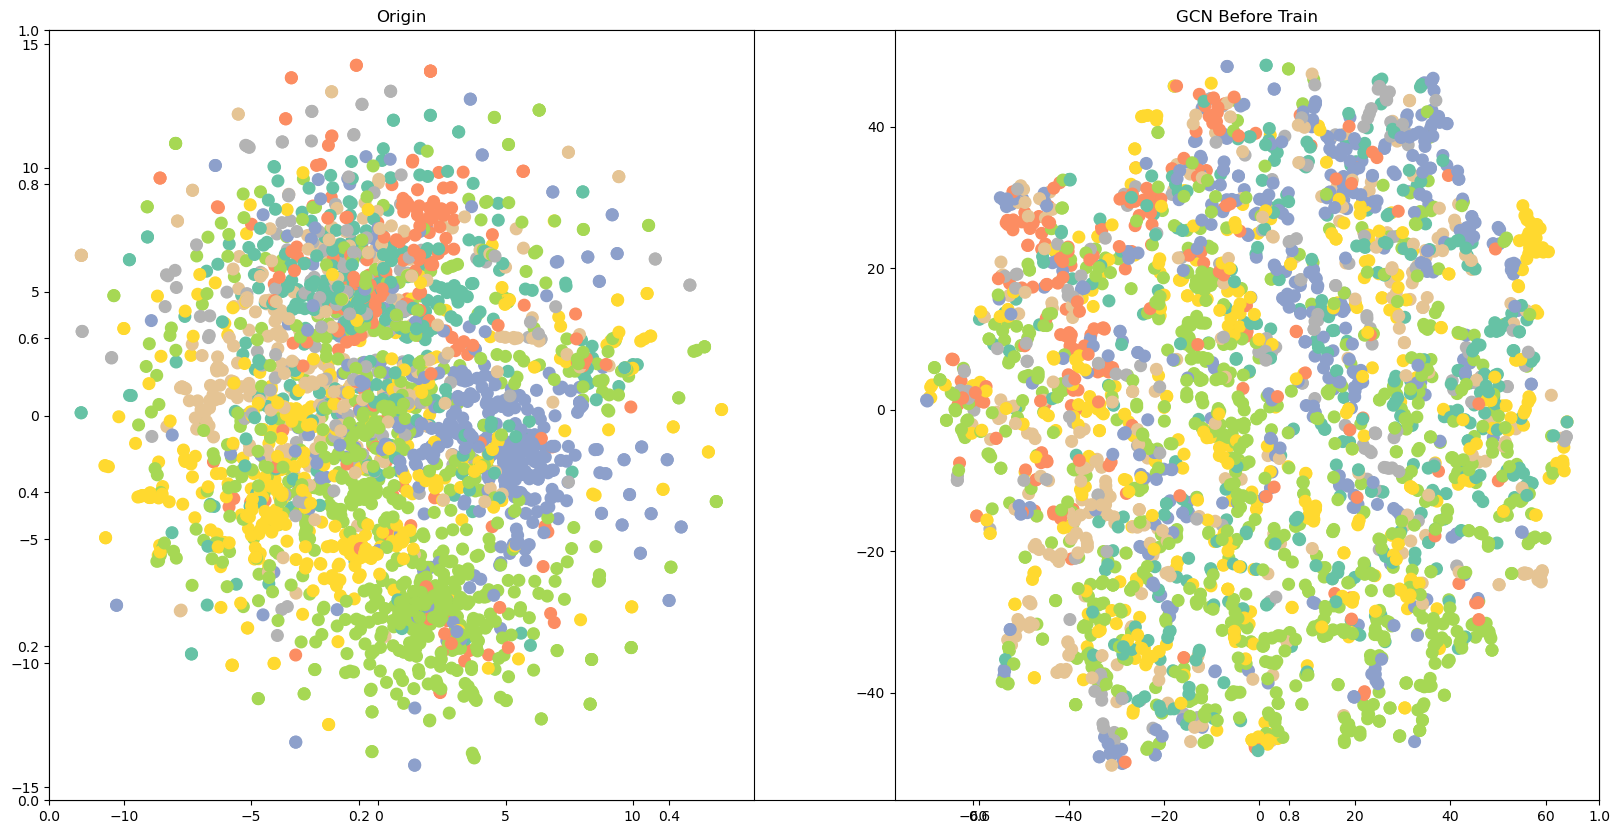

Epoch: 001, Loss: 1.9483
Epoch: 002, Loss: 1.8520
Epoch: 003, Loss: 1.7498
Epoch: 004, Loss: 1.6359
Epoch: 005, Loss: 1.5148
Epoch: 006, Loss: 1.3946
Epoch: 007, Loss: 1.2581
Epoch: 008, Loss: 1.1395
Epoch: 009, Loss: 1.0083
Epoch: 010, Loss: 0.9107
Epoch: 011, Loss: 0.8583
Epoch: 012, Loss: 0.7280
Epoch: 013, Loss: 0.6909
Epoch: 014, Loss: 0.6299
Epoch: 015, Loss: 0.5513
Epoch: 016, Loss: 0.4790
Epoch: 017, Loss: 0.4316
Epoch: 018, Loss: 0.3772
Epoch: 019, Loss: 0.3569
Epoch: 020, Loss: 0.3213
Epoch: 021, Loss: 0.2970
Epoch: 022, Loss: 0.2272
Epoch: 023, Loss: 0.2106
Epoch: 024, Loss: 0.1851
Epoch: 025, Loss: 0.1740
Epoch: 026, Loss: 0.1645
Epoch: 027, Loss: 0.1648
Epoch: 028, Loss: 0.1428
Epoch: 029, Loss: 0.1110
Epoch: 030, Loss: 0.1157
Epoch: 031, Loss: 0.1027
Epoch: 032, Loss: 0.1062
Epoch: 033, Loss: 0.0931
Epoch: 034, Loss: 0.0975
Epoch: 035, Loss: 0.0776
Epoch: 036, Loss: 0.0748
Epoch: 037, Loss: 0.0767
Epoch: 038, Loss: 0.0701
Epoch: 039, Loss: 0.0806
Epoch: 040, Loss: 0.0560


<Figure size 640x480 with 0 Axes>

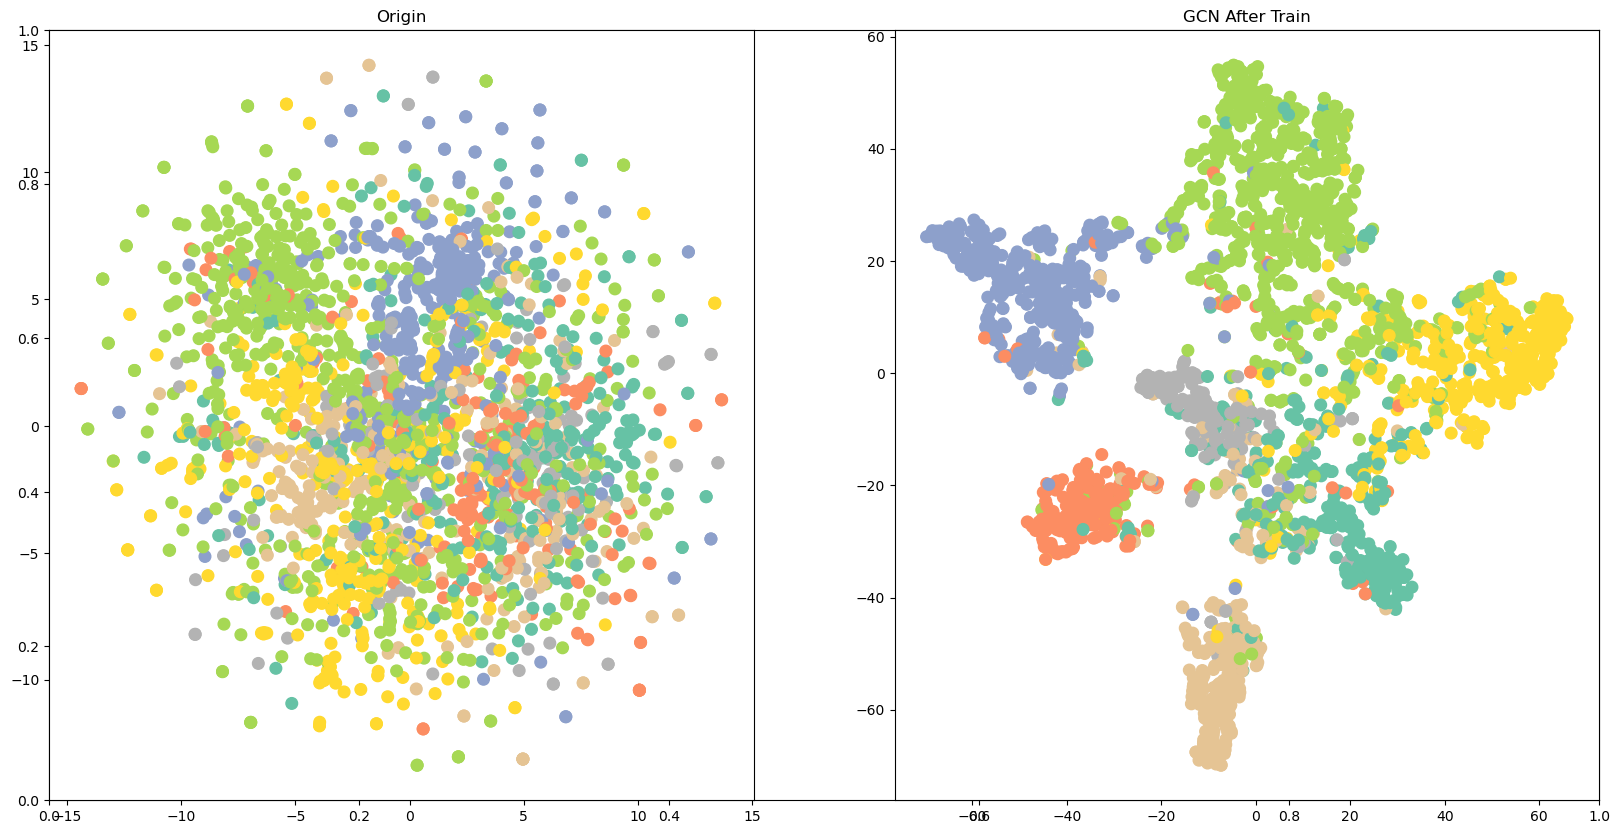

In [4]:
# GCN
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN网络定义
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# GCN网络训练函数   
def train():
      model.train()
      optimizer.zero_grad()
      out = model(data.x, data.edge_index)
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      return loss

# GCN网络测试函数   
def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)
      test_correct = pred[data.test_mask] == data.y[data.test_mask]
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
      return test_acc, out
    


import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_two(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")


model = GCN(hidden_channels=16)
#GCN(
#  (conv1): GCNConv(1433, 16)
#  (conv2): GCNConv(16, 7)
#)

# GCN未经训练时的输出——节点表征，及可视化
model.eval()
out = model(data.x, data.edge_index)

plt.figure(1)
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
visualize_two(data.x, color=data.y) # MLP分类结果可视化
plt.title("Origin")
plt.subplot(1, 2, 2)
visualize_two(out, color=data.y) # 原始数据的可视化
plt.title("GCN Before Train")
plt.show()


# 训练
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# 测试与可视化
test_acc, out = test()
print(f'Test Accuracy: {test_acc:.4f}')

plt.figure(2)
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
visualize_two(data.x, color=data.y) # MLP分类结果可视化
plt.title("Origin")
plt.subplot(1, 2, 2)
visualize_two(out, color=data.y) # 原始数据的可视化
plt.title("GCN After Train")
plt.show()

<Figure size 640x480 with 0 Axes>

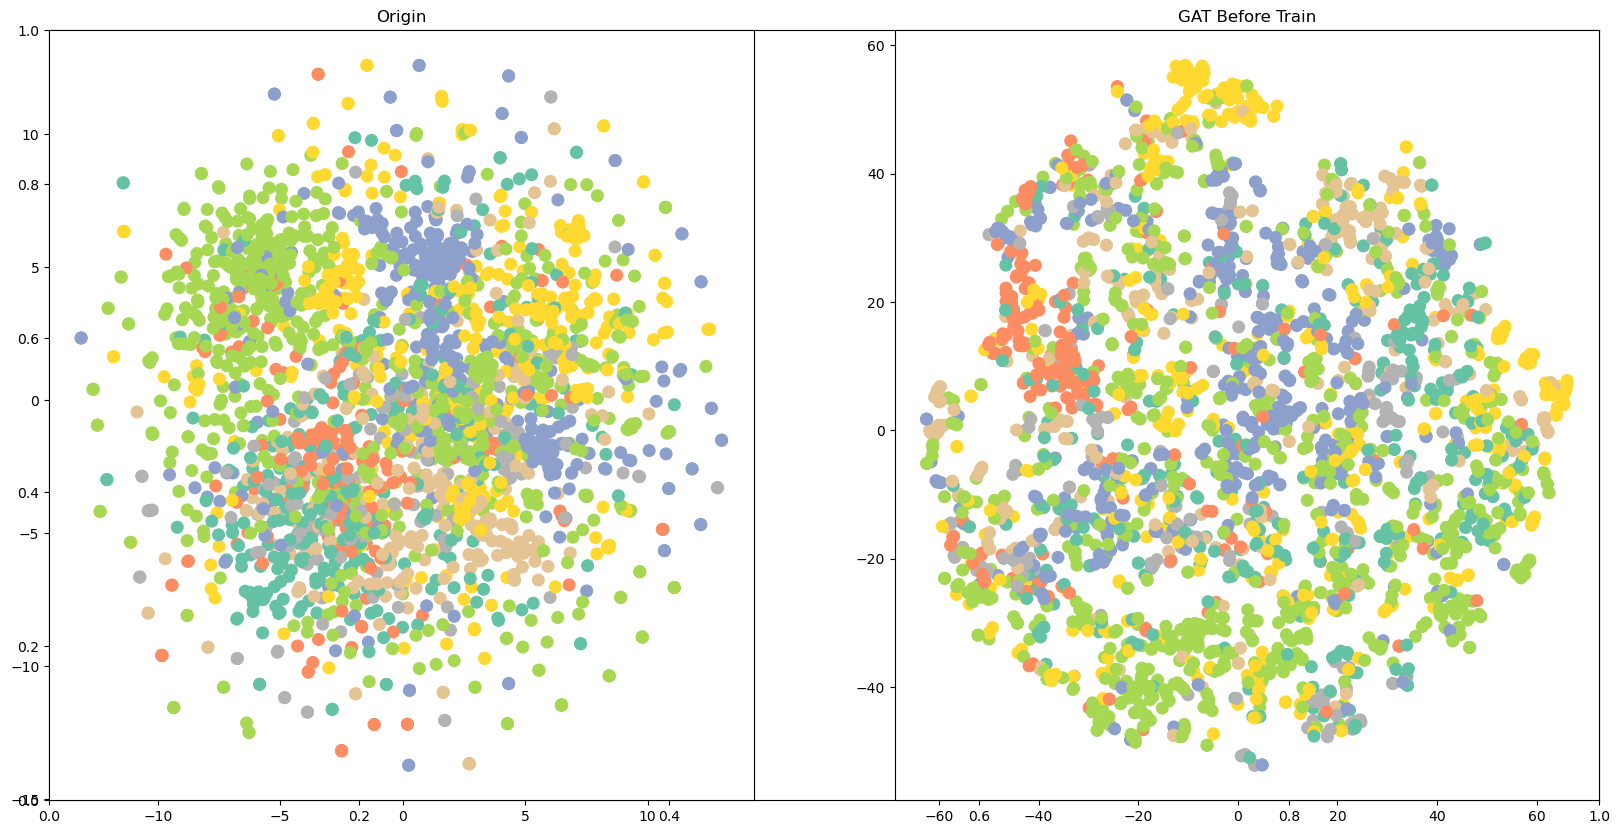

Epoch: 001, Loss: 1.9547
Epoch: 002, Loss: 1.8346
Epoch: 003, Loss: 1.7210
Epoch: 004, Loss: 1.5553
Epoch: 005, Loss: 1.4358
Epoch: 006, Loss: 1.2831
Epoch: 007, Loss: 1.1273
Epoch: 008, Loss: 1.0280
Epoch: 009, Loss: 0.9021
Epoch: 010, Loss: 0.8068
Epoch: 011, Loss: 0.7244
Epoch: 012, Loss: 0.6115
Epoch: 013, Loss: 0.5844
Epoch: 014, Loss: 0.4876
Epoch: 015, Loss: 0.4386
Epoch: 016, Loss: 0.3688
Epoch: 017, Loss: 0.3320
Epoch: 018, Loss: 0.2774
Epoch: 019, Loss: 0.2536
Epoch: 020, Loss: 0.2559
Epoch: 021, Loss: 0.1687
Epoch: 022, Loss: 0.2091
Epoch: 023, Loss: 0.1493
Epoch: 024, Loss: 0.1655
Epoch: 025, Loss: 0.1686
Epoch: 026, Loss: 0.1462
Epoch: 027, Loss: 0.1154
Epoch: 028, Loss: 0.1069
Epoch: 029, Loss: 0.1227
Epoch: 030, Loss: 0.0942
Epoch: 031, Loss: 0.0782
Epoch: 032, Loss: 0.0914
Epoch: 033, Loss: 0.0802
Epoch: 034, Loss: 0.1061
Epoch: 035, Loss: 0.0938
Epoch: 036, Loss: 0.0699
Epoch: 037, Loss: 0.0616
Epoch: 038, Loss: 0.0871
Epoch: 039, Loss: 0.0969
Epoch: 040, Loss: 0.0829


<Figure size 640x480 with 0 Axes>

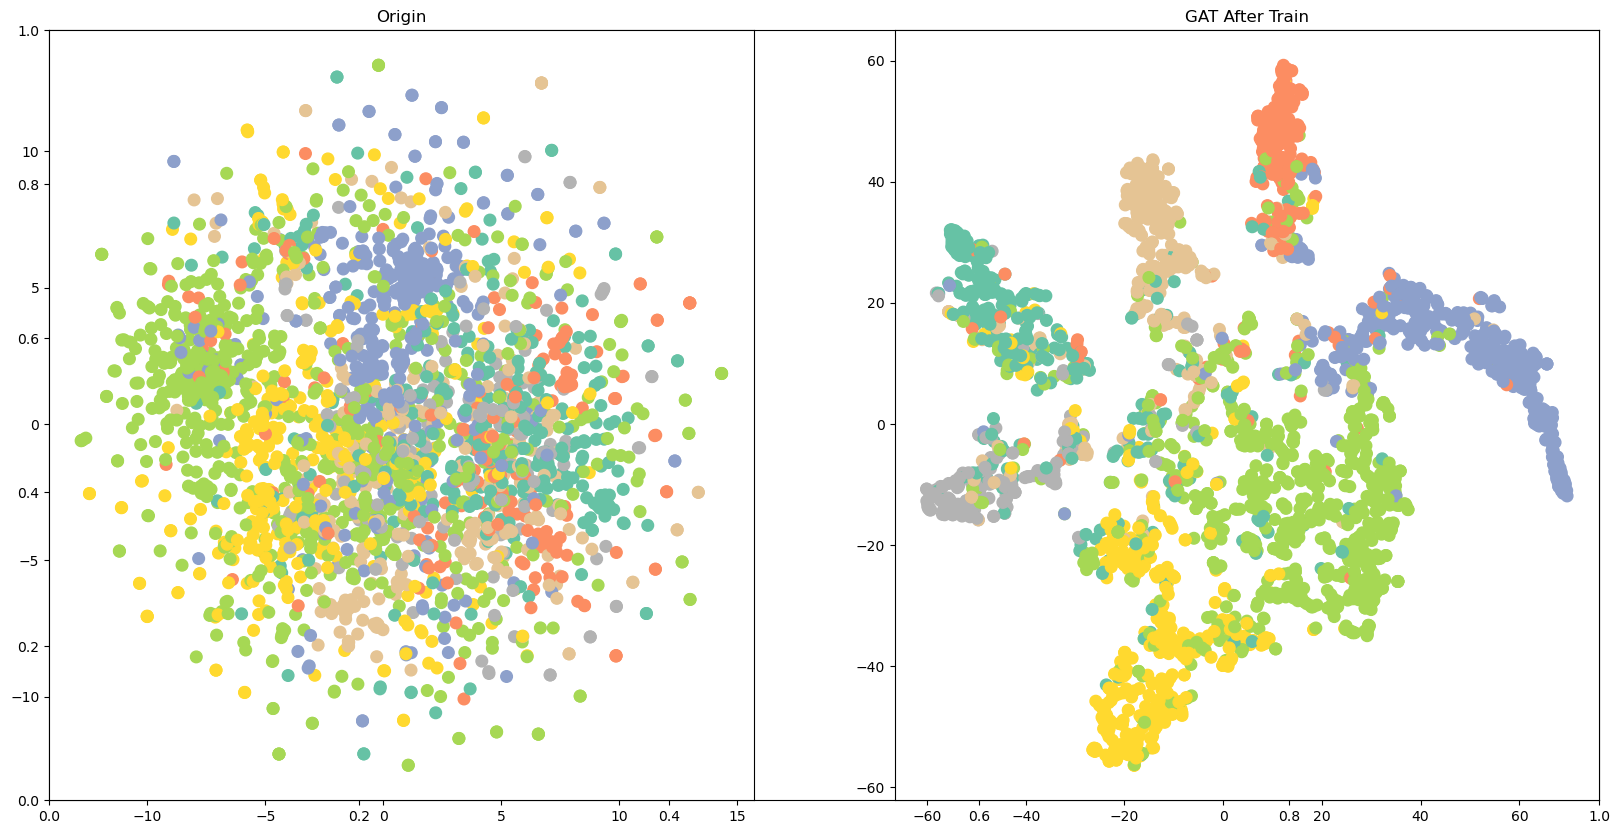

In [5]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv

# GAT网络定义
class GAT(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GAT, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GATConv(dataset.num_features, hidden_channels)
        self.conv2 = GATConv(hidden_channels, dataset.num_classes)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x
    
# GAT网络训练函数   
def train():
      model.train()
      optimizer.zero_grad()
      out = model(data.x, data.edge_index)
      loss = criterion(out[data.train_mask], data.y[data.train_mask])
      loss.backward()
      optimizer.step()
      return loss

# GAT网络测试函数   
def test():
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)
      test_correct = pred[data.test_mask] == data.y[data.test_mask]
      test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
      return test_acc, out
    

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_two(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())
    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")


model = GAT(hidden_channels=16)
#GAT(
#  (conv1): GATConv(1433, 16, heads=1)
#  (conv2): GATConv(16, 7, heads=1)
#)

# GAT未经训练时的输出——节点表征，及可视化
model.eval()
out = model(data.x, data.edge_index)
plt.figure(1)
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
visualize_two(data.x, color=data.y) # MLP分类结果可视化
plt.title("Origin")
plt.subplot(1, 2, 2)
visualize_two(out, color=data.y) # 原始数据的可视化
plt.title("GAT Before Train")
plt.show()

# 训练
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
for epoch in range(1, 201):
    loss = train()
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

# 测试与可视化
test_acc, out = test()
print(f'Test Accuracy: {test_acc:.4f}')

plt.figure(2)
fig, ax1 = plt.subplots(figsize=(20, 10))
plt.subplot(1, 2, 1)
visualize_two(data.x, color=data.y) # MLP分类结果可视化
plt.title("Origin")
plt.subplot(1, 2, 2)
visualize_two(out, color=data.y) # 原始数据的可视化
plt.title("GAT After Train")
plt.show()